<a href="https://colab.research.google.com/github/AnushkaKanabar/Supervised-Techniques-for-Parkinson-s-Disease-Detection/blob/main/Diagnosing_Parkinson's_disease_using_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons.csv to parkinsons (1).csv


In [ ]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from xgboost import XGBClassifier

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load parkinsons dataset
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Visualising the datset
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# Shape of the dataset 
df.shape

(195, 24)

### EXPLORATORY DATA ANALYSIS

#### FUNDAMENTAL FREQUENCIES ANALYSIS

In [ ]:
# Plotting Data correlation:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


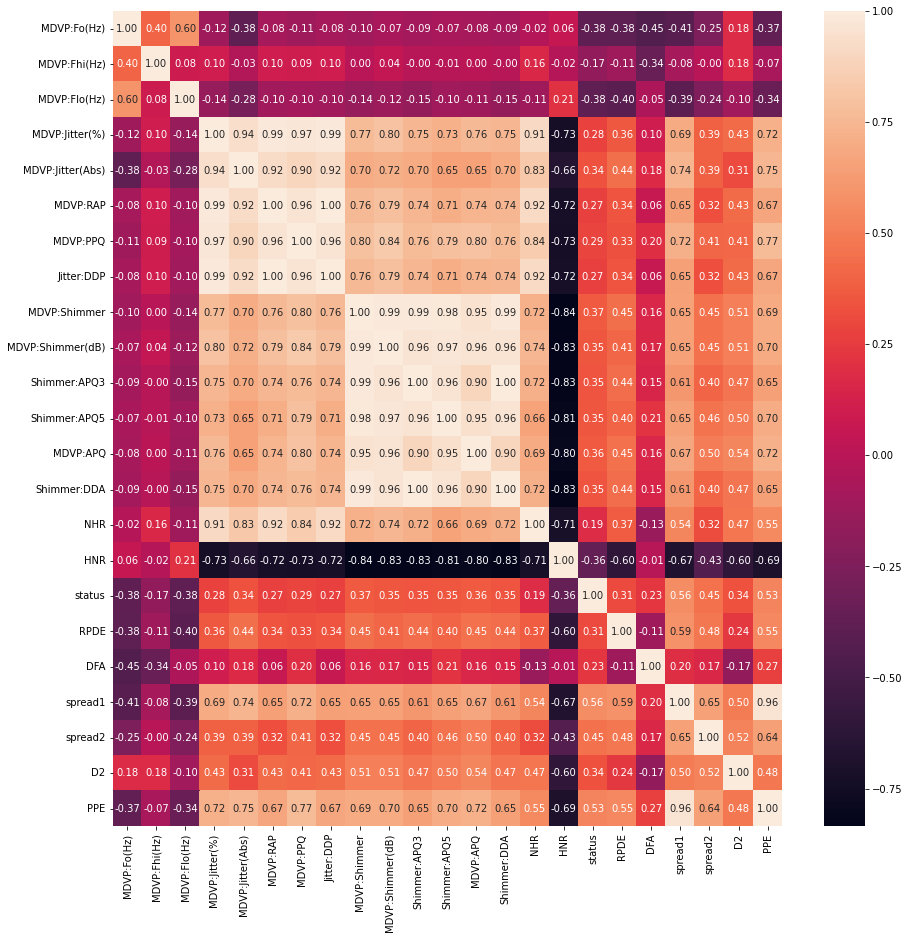

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')
plt.show()

**AVE. FUNDAMENTAL FREQUENCIES**

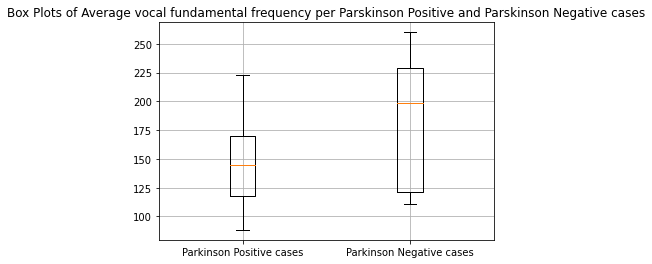

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [ ]:
affected_freq_avg = df[df['status']==1]['MDVP:Fo(Hz)'].values
not_affected_freq_avg = df[df['status']==0]['MDVP:Fo(Hz)'].values
plt.boxplot([affected_freq_avg,not_affected_freq_avg])
plt.title('Box Plots of Average vocal fundamental frequency per Parskinson Positive and Parskinson Negative cases')
plt.xticks([1,2],('Parkinson Positive cases','Parkinson Negative cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))



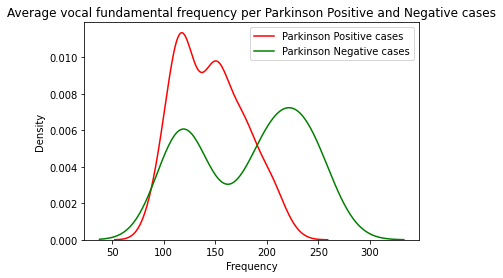

In [ ]:
sns.distplot(affected_freq_avg, color="red", hist=False, label="Parkinson Positive cases")
sns.distplot(not_affected_freq_avg,color="green", hist=False, label="Parkinson Negative cases")
plt.title('Average vocal fundamental frequency per Parkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

In [ ]:
x = PrettyTable()
x.field_names = ["Percentile", "Parkinson Positive cases", "Parkinson Negative cases"]
for i in range(0,101,5):
   x.add_row([i,np.round(np.percentile(affected_freq_avg,i),  3), np.round(np.percentile(not_affected_freq_avg,i), 3)])
print(x)

+------------+--------------------------+--------------------------+
| Percentile | Parkinson Positive cases | Parkinson Negative cases |
+------------+--------------------------+--------------------------+
|     0      |          88.333          |         110.739          |
|     5      |          99.394          |         114.012          |
|     10     |         109.439          |         116.014          |
|     15     |         112.136          |         116.396          |
|     20     |         114.942          |          116.91          |
|     25     |         117.572          |         120.948          |
|     30     |         120.061          |         124.635          |
|     35     |         122.342          |         128.602          |
|     40     |         128.138          |         174.588          |
|     45     |         138.878          |         197.691          |
|     50     |         145.174          |         198.996          |
|     55     |         149.728    

**MAXIMUM FREQUENCY**

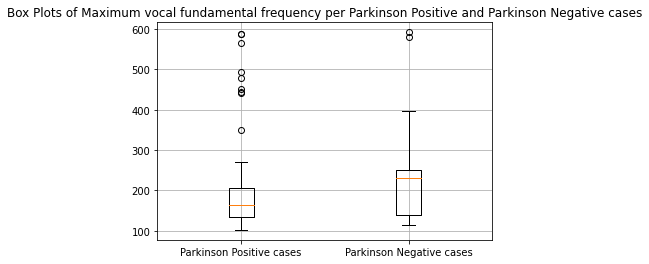

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [ ]:
affected_freq_hi = df[df['status']==1]['MDVP:Fhi(Hz)'].values
not_affected_freq_hi = df[df['status']==0]['MDVP:Fhi(Hz)'].values
plt.boxplot([affected_freq_hi,not_affected_freq_hi])
plt.title('Box Plots of Maximum vocal fundamental frequency per Parkinson Positive and Parkinson Negative cases')
plt.xticks([1,2],('Parkinson Positive cases', 'Parkinson Negative cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

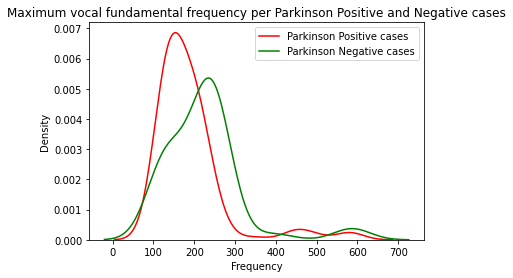

In [ ]:
sns.distplot(affected_freq_hi,color="red", hist=False, label="Parkinson Positive cases")
sns.distplot(not_affected_freq_hi,color="green", hist=False, label="Parkinson Negative cases")
plt.title('Maximum vocal fundamental frequency per Parkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()

In [ ]:


x = PrettyTable()
x.field_names = ["Percentile", "Parkinson Positive cases", "Parkinson Negative cases"]
for i in range(0,101,5):
   x.add_row([i,np.round(np.percentile(affected_freq_hi,i),  3), np.round(np.percentile(not_affected_freq_hi,i), 3)])
print(x)

+------------+--------------------------+--------------------------+
| Percentile | Parkinson Positive cases | Parkinson Negative cases |
+------------+--------------------------+--------------------------+
|     0      |         102.145          |         113.597          |
|     5      |         114.397          |         120.547          |
|     10     |         125.269          |         127.205          |
|     15     |         127.515          |         130.215          |
|     20     |         131.076          |         134.566          |
|     25     |         133.776          |         139.413          |
|     30     |         139.697          |         180.252          |
|     35     |         144.416          |         209.986          |
|     40     |         157.317          |         211.588          |
|     45     |         160.865          |         217.563          |
|     50     |         163.335          |         231.162          |
|     55     |         170.097    

**MINIMUM FREQUENCIES**

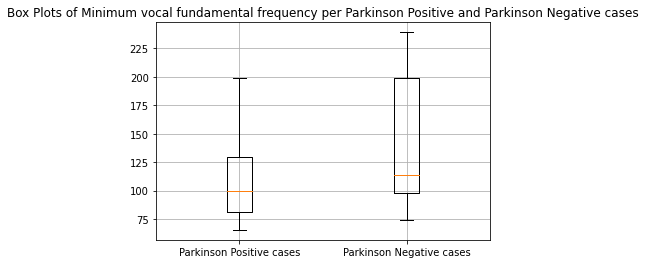

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [ ]:
affected_freq_low = df[df['status']==1]['MDVP:Flo(Hz)'].values
not_affected_freq_low = df[df['status']==0]['MDVP:Flo(Hz)'].values
plt.boxplot([affected_freq_low,not_affected_freq_low])
plt.title('Box Plots of Minimum vocal fundamental frequency per Parkinson Positive and Parkinson Negative cases')
plt.xticks([1,2],('Parkinson Positive cases', 'Parkinson Negative cases'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))



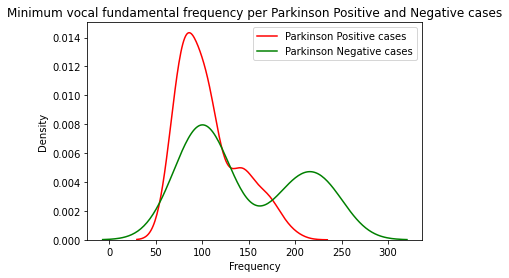

In [ ]:
sns.distplot(affected_freq_low,color="red", hist=False, label="Parkinson Positive cases")
sns.distplot(not_affected_freq_low,color="green", hist=False, label="Parkinson Negative cases")
plt.title('Minimum vocal fundamental frequency per Parkinson Positive and Negative cases')
plt.xlabel('Frequency')
plt.legend()
plt.show()


In [ ]:

x = PrettyTable()
x.field_names = ["Percentile", "Parkinson Positive cases", "Parkinson Negative cases"]
for i in range(0,101,5):
   x.add_row([i,np.round(np.percentile(affected_freq_low,i),  3), np.round(np.percentile(not_affected_freq_low,i), 3)])
print(x)

+------------+--------------------------+--------------------------+
| Percentile | Parkinson Positive cases | Parkinson Negative cases |
+------------+--------------------------+--------------------------+
|     0      |          65.476          |          74.287          |
|     5      |          67.66           |          78.062          |
|     10     |          75.347          |          86.521          |
|     15     |          76.761          |          90.967          |
|     20     |          79.092          |          95.322          |
|     25     |          80.876          |          98.244          |
|     30     |          84.05           |          99.945          |
|     35     |          86.87           |         103.747          |
|     40     |          90.607          |         108.238          |
|     45     |          94.549          |         109.888          |
|     50     |          99.77           |         113.938          |
|     55     |         104.352    

MIN and AVERAGE vocal fundamental frequencies are higher in case of Parkinson positive cases than in negative ones.

#### SHIMMER ANALYSIS

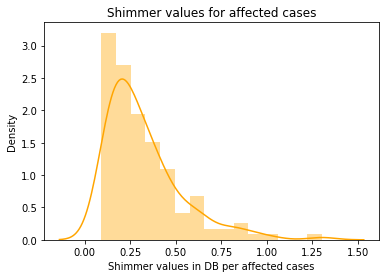

In [ ]:
affected_MDVP = df[df['status']==1]['MDVP:Shimmer(dB)'].values
not_affected_MDVP = df[df['status']==0]['MDVP:Shimmer(dB)'].values
sns.distplot(affected_MDVP,color="orange")
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

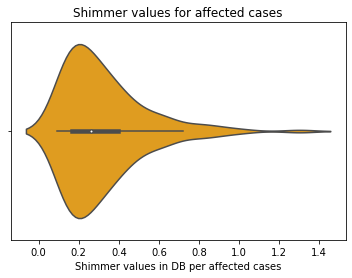

In [ ]:
sns.violinplot(affected_MDVP,color="orange")
plt.title('Shimmer values for affected cases')
plt.xlabel('Shimmer values in DB per affected cases')
plt.show()

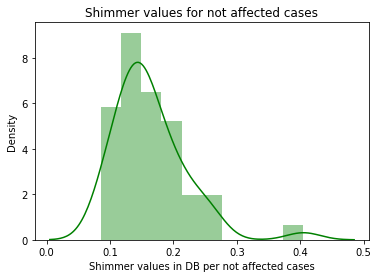

In [ ]:
sns.distplot(not_affected_MDVP,color="green")
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()

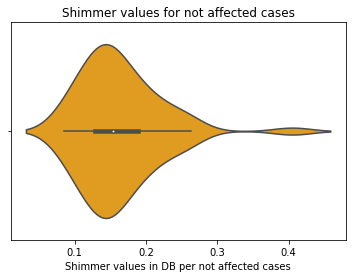

In [ ]:
sns.violinplot(not_affected_MDVP,color="orange")
plt.title('Shimmer values for not affected cases')
plt.xlabel('Shimmer values in DB per not affected cases')
plt.show()

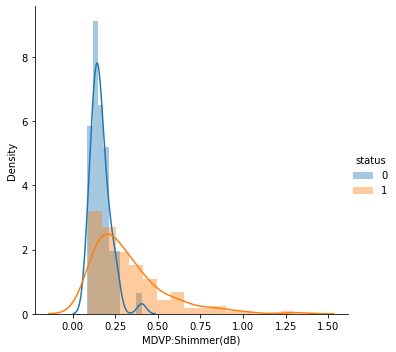

In [ ]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "MDVP:Shimmer(dB)").add_legend();
plt.show()

#### JITTER ANALYSIS

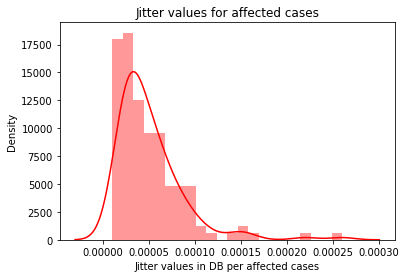

In [ ]:
affected_MDVP = df[df['status']==1]['MDVP:Jitter(Abs)'].values
not_affected_MDVP = df[df['status']==0]['MDVP:Jitter(Abs)'].values
sns.distplot(affected_MDVP,color="red")
plt.title('Jitter values for affected cases')
plt.xlabel('Jitter values in DB per affected cases')
plt.show()

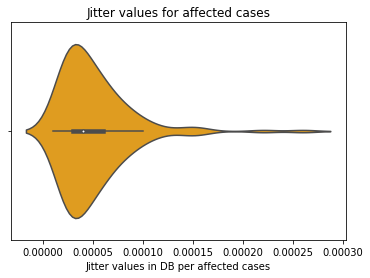

In [ ]:
sns.violinplot(affected_MDVP,color="orange")
plt.title('Jitter values for affected cases')
plt.xlabel('Jitter values in DB per affected cases')
plt.show()

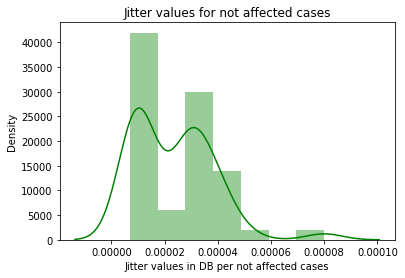

In [ ]:
sns.distplot(not_affected_MDVP,color="green")
plt.title('Jitter values for not affected cases')
plt.xlabel('Jitter values in DB per not affected cases')
plt.show()

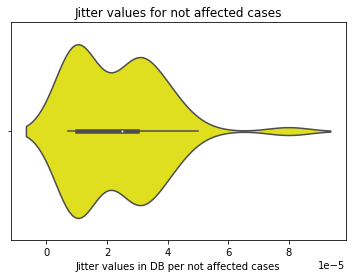

In [ ]:
sns.violinplot(not_affected_MDVP,color="yellow")
plt.title('Jitter values for not affected cases')
plt.xlabel('Jitter values in DB per not affected cases')
plt.show()

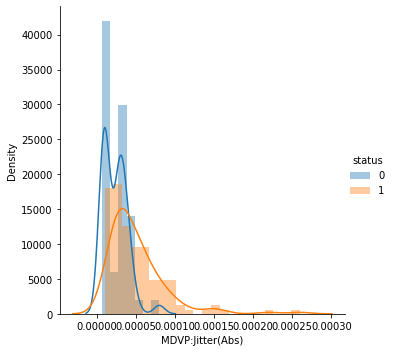

In [ ]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "MDVP:Jitter(Abs)").add_legend()
plt.show()


For Jitter and Shimmer , the MDVP:Shimmer(dB) and 'MDVP:Jitter(Abs) features don't contribute much to insight for the Parkinson cases. <br>
Perhaps other measures in the dataset may be yeild value or insight for further analysis. 

#### PCA

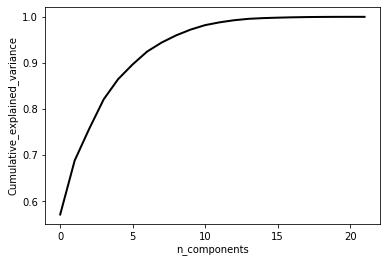

In [ ]:
status=df["status"]
standardized_data = StandardScaler().fit_transform(df.loc[:, df.columns != 'name'])
pca = decomposition.PCA()
pca.n_components = 22
sample_data=standardized_data
pca_data = pca.fit_transform(sample_data)

# Plot the PCA spectrum
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2,color="black")
plt.axis('tight')
#plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



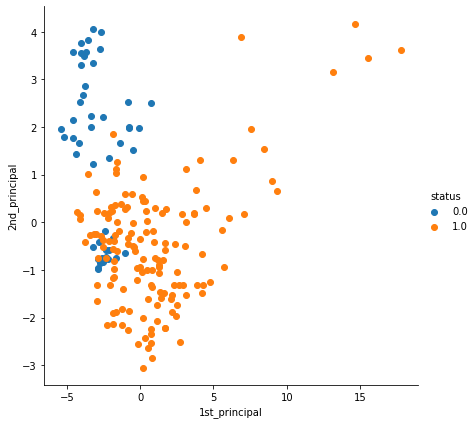

In [ ]:
# pca_reduced will contain the 2-d projects of simple data
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data = np.vstack((pca_data.T, status)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "status"))
sns.FacetGrid(pca_df, hue="status", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

shape of pca_reduced.shape =  (195, 3)


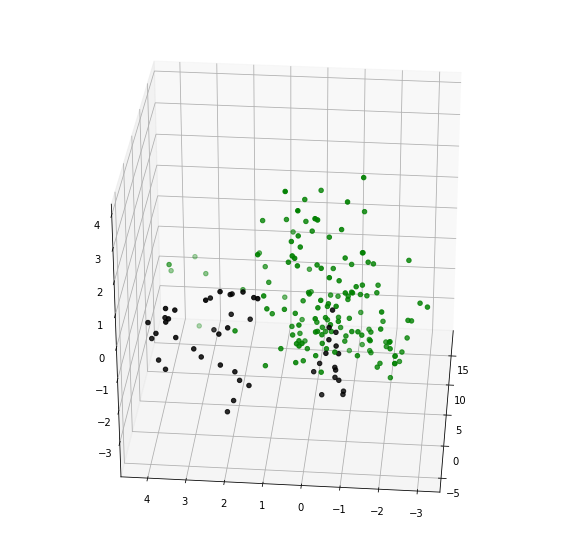

In [ ]:
pca.n_components = 3
pca_data = pca.fit_transform(sample_data)
print("shape of pca_reduced.shape = ", pca_data.shape)


pca_data = np.vstack((pca_data.T, status)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "3rd_principal","status"))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
c_map = {0: 'black', 1: 'green'} 
ax.scatter(pca_df['1st_principal'], pca_df['2nd_principal'], pca_df['3rd_principal'], c=[c_map[_] for _ in status], s=20)
ax.view_init(30, 185)
plt.show()

### MODEL PREPROCESSING


In [ ]:
# Extract all features besides 'status'
features = df.loc[:, df.columns != 'status'].values[:, 1:] # values use for array format

# Assign status values labels
labels = df.loc[:, 'status'].values

df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
#  Initialize MinMax Scaler classs for -1 to 1
scaler = MinMaxScaler((-1, 1))

# Fit_transform() method fits to the data and transforms it
X = scaler.fit_transform(features)
y = labels
print(X, y)

[[-0.63138346 -0.77481654 -0.89037042 ...  0.17153026 -0.21867743
  -0.0053808 ]
 [-0.6033463  -0.81013911 -0.4433544  ...  0.48267409 -0.05370956
   0.34265204]
 [-0.66992292 -0.88174367 -0.46942324 ...  0.37274182 -0.18236124
   0.19336492]
 ...
 [ 0.00546073 -0.43717403 -0.89854572 ... -0.31484696  0.11793486
  -0.63884033]
 [ 0.28578581  0.20361309 -0.89144127 ... -0.09423055 -0.36355605
  -0.67372646]
 [ 0.46654868 -0.35441175 -0.85610326 ... -0.16981039  0.00734563
  -0.5690805 ]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Split the dataset into training and testing sets 
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2)


### MODELING WITH XGBOOST


**MODEL FITTING**

In [ ]:
# Set up XGBoost Classifier and fit the model
model = XGBClassifier()
model.fit(x_train, y_train) # fit with x and y train


XGBClassifier()

**MODEL PREDICTION**


In [ ]:
#  Predict with XGBoost classifier
y_prediction = model.predict(x_test)
a= accuracy_score(y_test, y_prediction) * 100
print("XGBoost Accuracy:", f'{a: .4f}',"%")

XGBoost Accuracy:  89.7436 %


In [ ]:
# Confusion Matrix:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('True Negatives(TN) = ', cm[1,1])

print('False Positives(FP) = ', cm[0,1])

print('False Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[12  3]
 [ 1 23]]

True Positives(TP) =  12
True Negatives(TN) =  23
False Positives(FP) =  3
False Negatives(FN) =  1


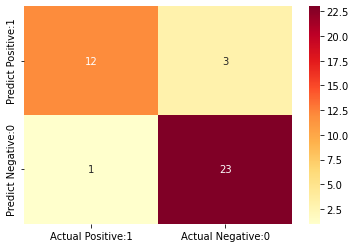

In [ ]:
# Plotting the Confusion matrix:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrRd')